# Ejemplo titanic

Este dataset contiene información sobre los pasajeros del Titanic y se utiliza comúnmente para predecir si un pasajero sobrevivió o no basándose en características como el género, la clase del boleto, la edad, el número de hermanos/esposas a bordo, etc.

Precisión: 0.786046511627907


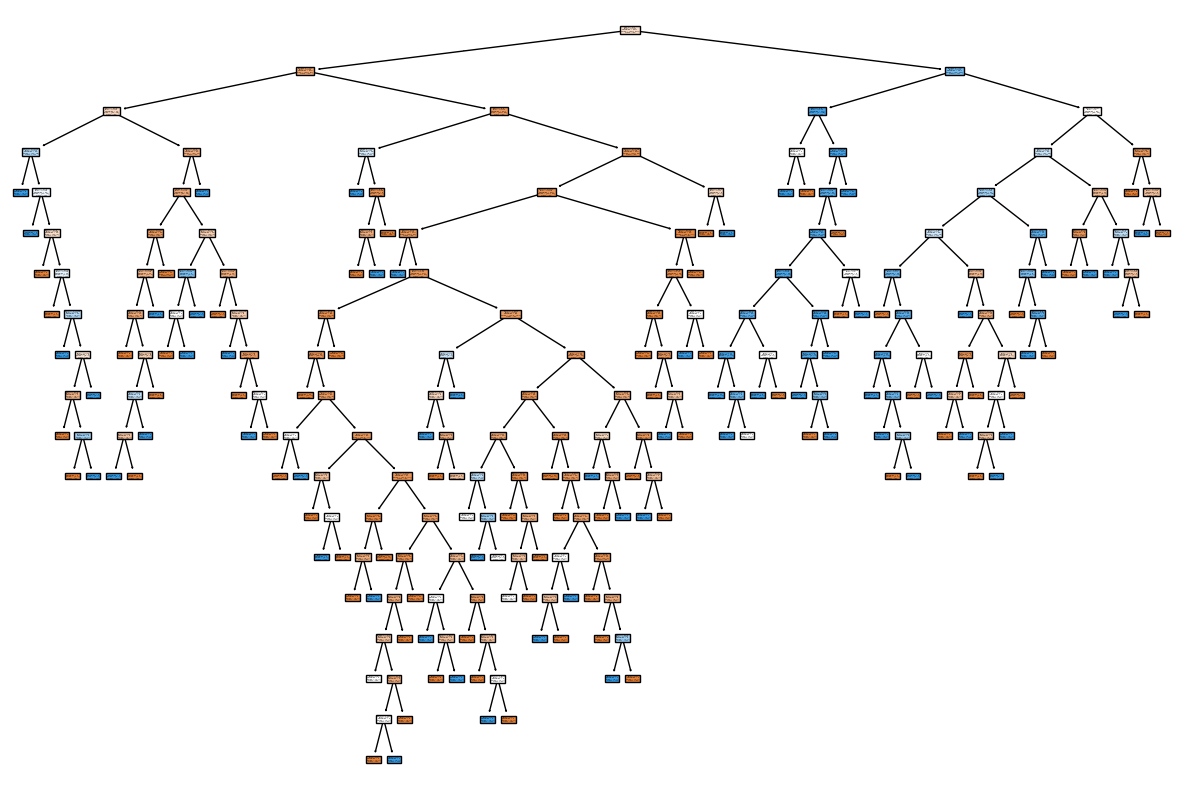

In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

# Cargar el dataset Titanic desde seaborn
df = sns.load_dataset('titanic')

# Limpiar el dataset y convertir las variables categóricas en numéricas
df = df.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'embarked', 'embarked'])
df = df.dropna()
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Definir características (X) y etiquetas (y)
X = df.drop(columns=['survived'])
y = df['survived']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Crear y entrenar el clasificador
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Calcular la precisión
print("Precisión:", metrics.accuracy_score(y_test, y_pred))

# Visualizar el árbol de decisión
plt.figure(figsize=(15,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()